## Problem Statement:
**One of the global banks would like to understand what factors driving credit card spend are. The bank want use these insights to calculate credit limit. In order to solve the problem, the bank conducted survey of 5000 customers and collected data. The objective of this case study is to understand what's driving the total spend (Primary Card + Secondary card). Given the factors, predict credit limit for the new applicants.**

### Load the dataset

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset link**: https://docs.google.com/spreadsheets/d/1hgz1-4H2wwrGstvXEIKTIiLfFz3ugL-X/edit?usp=sharing&ouid=110915608501026012424&rtpof=true&sd=true

In [3]:
pd.options.display.max_columns=150

In [4]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Datasets/MyCreditCardSpendPrediction/Data Set.xlsx')
df.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


**Columns Description**: https://docs.google.com/spreadsheets/d/1wK4Vb1X5LLQptfFShIlJhZA_TZv81Lmv/edit?usp=sharing&ouid=110915608501026012424&rtpof=true&sd=true

In [8]:
df.shape

(5000, 130)

In [6]:
df.size

650000

In [7]:
df.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=130)

### Missing Values

In [9]:
for column in df.columns:
    if df[column].isna().sum()!=0:
        print("{} {}".format(column, df[column].isna().sum()))

townsize 2
lncreddebt 1
lnothdebt 1
commutetime 2
longten 3
lnlongten 3
lntollmon 2622
lntollten 2622
lnequipmon 3296
lnequipten 3296
lncardmon 1419
cardten 2
lncardten 1422
lnwiremon 3656
lnwireten 3656


#### Inference
1. Percentage of Nan values in some columns is high so we cannot drop these rows.
2. Most of the Nan rows are present in column which is logarithmic value of original column.

### We just handle the missing values in non-Logrithmic columns first, then we will drop all the logrithmic columns which have Nan Values.

##### Imputing missing values in townsize column

In [10]:
df['townsize'].value_counts()

1.0    1436
2.0    1048
3.0     907
4.0     857
5.0     750
Name: townsize, dtype: int64

#### There are 5 unique values in the "townsize" column and it is categorical varibale so we will impute the missing values with "mode" of this column

In [11]:
df['townsize'].fillna(1, inplace=True)
df['townsize'].astype('int')
df['townsize'].isna().sum()

0

##### Imputing missing values in commutetime column

In [12]:
df['commutetime'].unique()

array([22., 29., 24., 38., 32., 23., 31., 25., 17., 28., 16., 14., 19.,
       30., 34., 27., 21., 26., 15., 20., 39., 18., 33., 37., 12., 36.,
       35., 42., 13., 44., 43., 11.,  9., 40., 41., 10., 46., nan, 47.,
       48., 45.,  8.])

#### This is Commute time in minutes and hence numeric column, so compute missing values with mean or median. Here we are imputing missing values with mean.

In [13]:
df['commutetime'].fillna(df['commutetime'].mean(), inplace=True)
df['commutetime'].isna().sum()

0

##### Imputing missing values in longten column

In [14]:
df['longten'].nunique()

4437

#### This column is numeric type hence we are computing missing values with Mean.

In [15]:
df['longten'].fillna(df['longten'].mean(), inplace=True)
df['longten'].isna().sum()

0

##### Imputing missing values in cardten column

In [16]:
df['cardten'].nunique()

697

#### This column is numeric type hence we are computing missing values with Mean.

In [17]:
df['cardten'].fillna(df['cardten'].mean(), inplace=True)
df['cardten'].isna().sum()

0

### Now we are going to drop all the Logrithm columns

In [18]:
df.dropna(axis=1, inplace=True)
for column in df.columns:
    if df[column].isna().sum()!=0:
        print("{} {}".format(column, df[column].isna().sum()))
else:
    print("No mising Values")

No mising Values


In [19]:
df.head(2)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,othdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,tollfree,tollmon,tollten,equip,equipmon,equipten,callcard,cardmon,cardten,wireless,wiremon,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,2.240091,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.5,1.871802,34.4,1,29.0,161.05,1,29.50,126.1,1,14.25,60.0,0,0.00,0.00,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,1.567980,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.9,2.186051,330.6,0,0.0,0.00,1,54.85,1975.0,1,16.00,610.0,1,45.65,1683.55,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0


#### There are two more logrthmic column "lnlongmon", "lninc" drop this too

In [20]:
df.drop(['lnlongmon','lninc'], axis=1, inplace=True)

In [21]:
df.shape

(5000, 117)

### The objective of this case study is to understand what's driving the total spend (Primary Card + Secondary card) hence we are going to add "card1spent" and "card2spent" and create new columns "totalspent"

In [22]:
df['totalspent']=df['cardspent']+df['card2spent']
df.shape

(5000, 118)

#### Drop cardspent and card2spent as we created new columns using these

In [23]:
df.drop(['cardspent', 'card2spent', 'custid'], axis=1, inplace=True)
df.shape

(5000, 115)

## Feature Engineering

In [24]:
cat=['region','townsize','gender','agecat','edcat','birthmonth','jobcat','union','employ','empcat','retire',
          'inccat','default','jobsat','marital','spousedcat','homeown','hometype','address','addresscat','cars','carown',
          'cartype','carcatvalue','carbought','carbuy','commute','commutecat','commutecar',
          'commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk',
         'commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','card','cardtype','cardbenefit',
         'cardfee','cardtenure','cardtenurecat','card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat',
         'active','bfast','churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid',
         'callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax',
          'news','response_01','response_02','response_03']
cont=['age', 'ed', 'spoused', 'income','debtinc', 'creddebt', 'othdebt', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles',
     'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'tenure', 'longmon', 'longten', 'tollmon', 'tollten', 'equipmon',
     'equipten', 'cardmon', 'cardten', 'wiremon', 'wireten', 'hourstv', 'totalspent']

### Create Continous and Categorical Columns

In [25]:
categorical=df[cat]
categorical.head()

,region,townsize,gender,agecat,edcat,birthmonth,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,3,September,1,1,0,1,0,2,1,1,0,-1,0,2,0,1,2,1,0,1,0,0,8,4,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,4,May,2,0,0,1,0,1,1,1,0,-1,1,3,2,1,2,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,2,June,2,0,16,5,0,2,0,4,1,2,1,1,30,5,3,1,1,1,0,1,4,3,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,3,May,2,0,0,1,0,1,1,2,1,4,1,3,3,2,3,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,3,July,2,0,1,1,0,1,0,1,1,2,0,2,3,2,1,0,1,1,0,1,6,3,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


In [26]:
categorical.shape

(5000, 84)

In [27]:
continous=df[cont]
continous.head()

,age,ed,spoused,income,debtinc,creddebt,othdebt,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,longten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,totalspent
0,20,15,-1,31,11.1,1.200909,2.240091,3,0,0,0,0,0,0,0,0,14.3,22.0,5,6.50,34.40,29.0,161.05,29.50,126.1,14.25,60.0,0.00,0.00,13,149.46
1,22,17,-1,15,18.6,1.222020,1.567980,2,6,0,0,0,0,0,0,6,6.8,29.0,39,8.90,330.60,0.0,0.00,54.85,1975.0,16.00,610.0,45.65,1683.55,18,77.54
2,67,14,13,35,9.9,0.928620,2.536380,3,3,2,1,0,0,0,0,0,18.8,24.0,65,28.40,1858.35,0.0,0.00,0.00,0.0,23.00,1410.0,0.00,0.00,21,359.97
3,23,16,18,20,5.7,0.022800,1.117200,5,0,0,0,0,0,0,0,0,8.7,38.0,36,6.00,199.45,0.0,0.00,0.00,0.0,21.00,685.0,0.00,0.00,26,359.41
4,26,16,13,23,1.7,0.214659,0.176341,4,0,0,0,0,0,0,0,0,10.6,32.0,21,3.05,74.10,16.5,387.70,0.00,0.0,17.25,360.0,19.05,410.80,27,507.83


In [28]:
continous.shape

(5000, 31)

### Statistical Information for continous columns

In [29]:
continous.describe(percentiles=[.25,.50,.75,.90,.95,.99]).round(2)

,age,ed,spoused,income,debtinc,creddebt,othdebt,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,longten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,totalspent
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,47.03,14.54,6.11,54.76,9.95,1.86,3.65,2.20,3.07,0.50,0.39,0.11,0.06,0.11,0.05,1.85,23.23,25.35,38.20,13.47,708.87,13.26,577.83,12.99,470.18,15.44,720.48,10.70,421.98,19.64,498.08
std,17.77,3.28,7.74,55.38,6.40,3.42,5.40,1.39,3.41,0.86,0.80,0.49,0.33,0.57,0.47,3.07,21.23,5.88,22.66,12.77,979.00,16.31,949.15,19.21,912.22,15.01,922.04,19.80,1001.00,5.17,351.53
min,18.00,6.00,-1.00,9.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,8.00,0.00,0.90,0.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.11
25%,31.00,12.00,-1.00,24.00,5.10,0.39,0.98,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.20,21.00,18.00,5.70,104.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.00,276.28
50%,47.00,14.00,-1.00,38.00,8.80,0.93,2.10,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.00,25.00,38.00,9.55,350.20,0.00,0.00,0.00,0.00,13.75,425.00,0.00,0.00,20.00,414.25
75%,62.00,17.00,14.00,67.00,13.60,2.06,4.31,3.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,4.00,31.10,29.00,59.00,16.55,913.51,24.50,885.45,30.80,510.16,22.75,1080.00,20.96,89.96,23.00,615.56
90%,72.00,19.00,16.00,109.10,18.60,4.30,8.06,4.00,8.00,2.00,2.00,0.00,0.00,0.00,0.00,7.00,52.91,33.00,69.00,27.00,1808.81,35.50,1918.96,42.70,1912.33,34.00,1870.50,40.86,1778.54,26.00,908.13
95%,76.00,20.00,18.00,147.00,22.20,6.37,11.82,5.00,10.00,2.00,2.00,1.00,0.00,1.00,0.00,8.00,72.00,35.00,72.00,36.76,2565.93,43.50,2620.21,49.05,2600.99,42.00,2455.25,51.31,2687.92,28.00,1145.15
99%,79.00,21.00,20.00,272.01,29.20,14.28,24.06,6.00,13.00,3.00,3.00,3.00,2.00,3.00,2.00,11.00,92.00,40.01,72.00,65.20,4688.04,58.75,3977.27,63.30,3679.46,64.25,4010.40,78.30,4530.19,31.00,1760.10


### Statistical infrmation for categorical columns

In [30]:
categorical.describe()

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,5000.0000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.00140,2.686600,0.503600,4.238800,2.672000,2.7528,0.15120,9.730400,2.9326,0.147600,2.392200,0.23420,2.964200,0.480200,0.641400,0.62960,1.84260,16.402400,3.272000,2.130600,0.641400,0.343800,1.389400,0.221000,0.361000,2.996200,1.973400,0.679000,0.102600,0.271800,0.406000,0.274600,0.095400,0.123400,0.383800,0.058400,0.188000,7.636800,4.08860,0.381400,0.238400,0.518000,2.714200,2.507000,2.505800,0.189800,16.655800,3.782200,2.774400,2.541200,2.534000,0.187200,13.084400,3.571400,0.466000,2.05860,0.253200,0.475600,0.340800,0.716200,0.26880,0.488400,0.303000,0.243600,1.199600,0.475200,0.479000,0.480600,0.478000,0.348600,0.983000,0.915600,0.913600,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600
std,1.42176,1.426039,0.500037,1.308785,1.211738,1.7379,0.35828,9.690929,1.4533,0.354739,1.221261,0.42354,1.379456,0.499658,1.886775,0.48296,0.91673,12.397484,1.319987,1.307473,0.654898,0.651526,1.081296,0.609125,0.480339,2.743518,1.258972,0.466907,0.303466,0.444932,0.491134,0.446357,0.293796,0.328929,0.486359,0.234522,0.390751,2.850002,1.38706,0.485779,0.426148,0.499726,1.184905,1.118482,1.117236,0.392182,12.020958,1.353783,1.173448,1.118818,1.117271,0.390111,9.119403,1.363845,0.498893,0.82952,0.434888,0.499454,0.474026,0.450886,0.44338,0.499915,0.459601,0.429297,1.449338,0.499435,0.499609,0.499673,0.499566,0.476575,0.129284,0.278015,0.280982,0.250393,0.400788,0.48209,0.499617,0.499415,0.383223,0.499299,0.276815,0.336117,0.303466
min,1.00000,1.000000,0.000000,2.000000,1.000000,1.0000,0.00000,0.000000,1.0000,0.000000,1.000000,0.00000,1.000000,0.000000,-1.000000,0.00000,1.00000,0.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,1.000000,0.000000,3.000000,2.000000,1.0

### Duplicate rows

In [31]:
continous.duplicated().sum()

0

In [32]:
categorical.duplicated().sum()

0

#### No duplicate rows in both continous and categorical dataframe

### Feature Selection
- Choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.
- Here Target variable is Continuous, hence below two scenarios will be present
1. **Continuous Target Variable Vs Continuous Predictor.**- Scatter plot, Correlation
2. **Continuous Target Variable Vs Categorical Predictor**- Boxplot, ANOVA test

### What are the Continous columns driving the total spend.

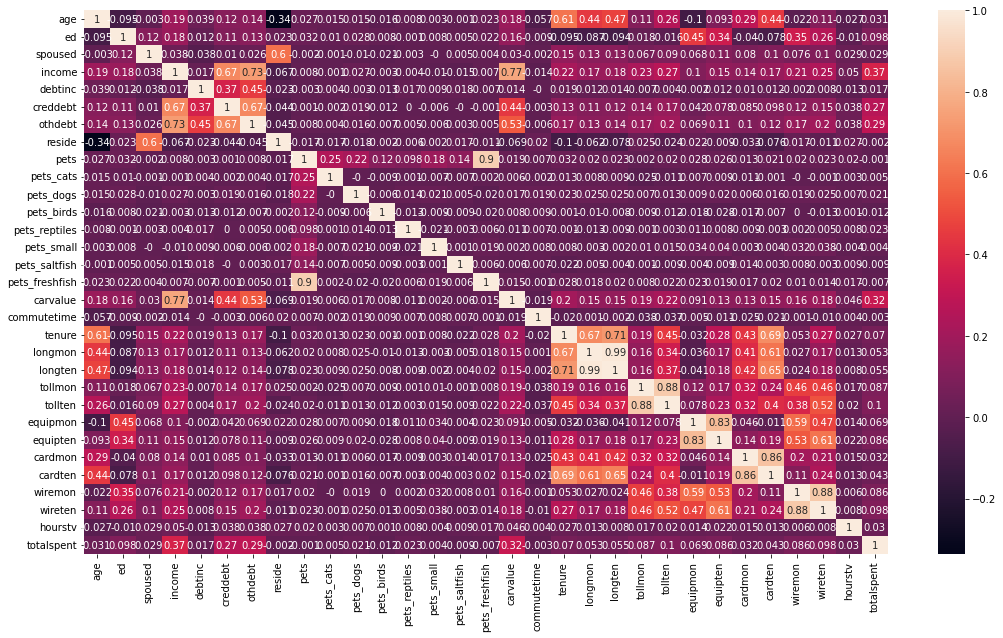

In [33]:
correlation=continous.corr().round(3)
plt.figure(figsize=(18,10))
sns.heatmap(correlation, annot=True);

#### Selecting columns where absolute correlation > 0.05 with Target Variable

In [34]:
selected_columns=correlation['totalspent'][abs(correlation['totalspent']) > 0.05]
selected_columns

ed            0.098
income        0.373
creddebt      0.265
othdebt       0.293
carvalue      0.317
tenure        0.070
longmon       0.053
longten       0.055
tollmon       0.087
tollten       0.100
equipmon      0.069
equipten      0.086
wiremon       0.086
wireten       0.098
totalspent    1.000
Name: totalspent, dtype: float64

### For further analysis we are selecting Continous columns with absolute correlation greater than 0.05.

In [35]:
cont_new=continous[selected_columns.index]
cont_new.head()

,ed,income,creddebt,othdebt,carvalue,tenure,longmon,longten,tollmon,tollten,equipmon,equipten,wiremon,wireten,totalspent
0,15,31,1.200909,2.240091,14.3,5,6.50,34.40,29.0,161.05,29.50,126.1,0.00,0.00,149.46
1,17,15,1.222020,1.567980,6.8,39,8.90,330.60,0.0,0.00,54.85,1975.0,45.65,1683.55,77.54
2,14,35,0.928620,2.536380,18.8,65,28.40,1858.35,0.0,0.00,0.00,0.0,0.00,0.00,359.97
3,16,20,0.022800,1.117200,8.7,36,6.00,199.45,0.0,0.00,0.00,0.0,0.00,0.00,359.41
4,16,23,0.214659,0.176341,10.6,21,3.05,74.10,16.5,387.70,0.00,0.0,19.05,410.80,507.83


### "ed", "income", "creddebt", "othdebt", "carvalue",  "tenure", "longmon", "longten", "tollmon", "tollten", "equipmon", "equipten", "wiremon", "wireten" are the continous colmns driving the total credit card spend.

In [36]:
cont_new.shape

(5000, 15)

### What are the Categorical columns driving the total spend.

In [37]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(data, TargetVariable, CatCols):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('ANOVA Results\n')
    for predictor in CatCols:
        CategoryGroupLists=data.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)


CategoricalPredictor=cat
FunctionAnova(data=df, 
              TargetVariable='totalspent', 
              CatCols=CategoricalPredictor)

ANOVA Results

region is correlated with totalspent | P-Value: 0.03322502935703053
townsize is NOT correlated with totalspent | P-Value: 0.8743170386077789
gender is correlated with totalspent | P-Value: 7.050188743404547e-08
agecat is correlated with totalspent | P-Value: 7.725589990021682e-29
edcat is correlated with totalspent | P-Value: 8.291211570207953e-10
birthmonth is NOT correlated with totalspent | P-Value: 0.9846047749699802
jobcat is correlated with totalspent | P-Value: 5.67966754408382e-07
union is NOT correlated with totalspent | P-Value: 0.5706785447671918
employ is correlated with totalspent | P-Value: 6.242893530010594e-08
empcat is correlated with totalspent | P-Value: 1.9702174643418561e-13
retire is correlated with totalspent | P-Value: 1.7552337296881135e-30
inccat is correlated with totalspent | P-Value: 1.0216423124297485e-162
default is NOT correlated with totalspent | P-Value: 0.40894288819182456
jobsat is correlated with totalspent | P-Value: 3.88763001387822

['region',
 'gender',
 'agecat',
 'edcat',
 'jobcat',
 'employ',
 'empcat',
 'retire',
 'inccat',
 'jobsat',
 'spousedcat',
 'homeown',
 'hometype',
 'address',
 'addresscat',
 'carown',
 'carcatvalue',
 'commutebike',
 'reason',
 'vote',
 'card',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2fee',
 'card2tenure',
 'card2tenurecat',
 'tollfree',
 'equip',
 'callcard',
 'wireless',
 'multline',
 'voice',
 'pager',
 'internet',
 'callid',
 'callwait',
 'forward',
 'confer',
 'owntv',
 'ownvcr',
 'owndvd',
 'owncd',
 'ownpda',
 'ownpc',
 'ownipod',
 'ownfax',
 'news',
 'response_03']

### 'region', 'gender', 'agecat', 'edcat', 'jobcat', 'employ', 'empcat', 'retire', 'inccat', 'jobsat', 'spousedcat', 'homeown', 'hometype', 'address', 'addresscat', 'carown', 'carcatvalue', 'commutebike', 'reason', 'vote', 'card', 'cardtenure', 'cardtenurecat', 'card2', 'card2fee', 'card2tenure', 'card2tenurecat', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'owntv', 'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'ownfax', 'news', 'response_03' These are the Selected categorical columns and these columns driving the Total credit card spent.

In [38]:
sel_cat_col=['region', 'gender', 'agecat', 'edcat', 'jobcat', 'employ', 'empcat', 'retire', 'inccat', 'jobsat', 
             'spousedcat', 'homeown', 'hometype', 'address', 'addresscat', 'carown', 'carcatvalue', 'commutebike',
             'reason', 'vote', 'card', 'cardtenure', 'cardtenurecat', 'card2', 'card2fee', 'card2tenure', 
             'card2tenurecat', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 
             'internet', 'callid', 'callwait', 'forward', 'confer', 'owntv', 'ownvcr', 'owndvd', 'owncd', 
             'ownpda', 'ownpc', 'ownipod', 'ownfax', 'news', 'response_03']
cat_new=categorical[sel_cat_col]
cat_new.head()

,region,gender,agecat,edcat,jobcat,employ,empcat,retire,inccat,jobsat,spousedcat,homeown,hometype,address,addresscat,carown,carcatvalue,commutebike,reason,vote,card,cardtenure,cardtenurecat,card2,card2fee,card2tenure,card2tenurecat,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,ownfax,news,response_03
0,1,1,2,3,1,0,1,0,2,1,-1,0,2,0,1,1,1,0,9,1,3,2,2,5,0,3,2,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0
1,5,0,2,4,2,0,1,0,1,1,-1,1,3,2,1,1,1,1,9,0,2,4,2,4,0,4,2,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,0
2,3,1,6,2,2,16,5,0,2,4,2,1,1,30,5,1,1,0,2,0,2,35,5,4,0,25,5,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0
3,4,0,2,3,2,0,1,0,1,2,4,1,3,3,2,1,1,0,9,0,2,5,2,3,0,5,2,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,0,1,1,0,1,0
4,2,0,3,3,2,1,1,0,1,1,2,0,2,3,2,0,1,0,9,0,4,8,3,1,0,9,3,1,0,1,1,0,1,0,3,1,1,1,1,1,1,1,1,0,1,0,0,0,0


In [39]:
cat_new.shape

(5000, 49)

### Join the two  dataframe to create final dataframe

In [40]:
data=pd.concat([cat_new, cont_new], axis=1)
data.head()

,region,gender,agecat,edcat,jobcat,employ,empcat,retire,inccat,jobsat,spousedcat,homeown,hometype,address,addresscat,carown,carcatvalue,commutebike,reason,vote,card,cardtenure,cardtenurecat,card2,card2fee,card2tenure,card2tenurecat,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,ownfax,news,response_03,ed,income,creddebt,othdebt,carvalue,tenure,longmon,longten,tollmon,tollten,equipmon,equipten,wiremon,wireten,totalspent
0,1,1,2,3,1,0,1,0,2,1,-1,0,2,0,1,1,1,0,9,1,3,2,2,5,0,3,2,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0,15,31,1.200909,2.240091,14.3,5,6.50,34.40,29.0,161.05,29.50,126.1,0.00,0.00,149.46
1,5,0,2,4,2,0,1,0,1,1,-1,1,3,2,1,1,1,1,9,0,2,4,2,4,0,4,2,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,0,17,15,1.222020,1.567980,6.8,39,8.90,330.60,0.0,0.00,54.85,1975.0,45.65,1683.55,77.54
2,3,1,6,2,2,16,5,0,2,4,2,1,1,30,5,1,1,0,2,0,2,35,5,4,0,25,5,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,14,35,0.928620,2.536380,18.8,65,28.40,1858.35,0.0,0.00,0.00,0.0,0.00,0.00,359.97
3,4,0,2,3,2,0,1,0,1,2,4,1,3,3,2,1,1,0,9,0,2,5,2,3,0,5,2,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,0,1,1,0,1,0,16,20,0.022800,1.117200,8.7,36,6.00,199.45,0.0,0.00,0.00,0.0,0.00,0.00,359.41
4,2,0,3,3,2,1,1,0,1,1,2,0,2,3,2,0,1,0,9,0,4,8,3,1,0,9,3,1,0,1,1,0,1,0,3,1,1,1,1,1,1,1,1,0,1,0,0,0,0,16,23,0.214659,0.176341,10.6,21,3.05,74.10,16.5,387.70,0.00,0.0,19.05,410.80,507.83


In [41]:
data.shape

(5000, 64)

In [42]:
data.columns

Index(['region', 'gender', 'agecat', 'edcat', 'jobcat', 'employ', 'empcat',
       'retire', 'inccat', 'jobsat', 'spousedcat', 'homeown', 'hometype',
       'address', 'addresscat', 'carown', 'carcatvalue', 'commutebike',
       'reason', 'vote', 'card', 'cardtenure', 'cardtenurecat', 'card2',
       'card2fee', 'card2tenure', 'card2tenurecat', 'tollfree', 'equip',
       'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet',
       'callid', 'callwait', 'forward', 'confer', 'owntv', 'ownvcr', 'owndvd',
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'ownfax', 'news', 'response_03',
       'ed', 'income', 'creddebt', 'othdebt', 'carvalue', 'tenure', 'longmon',
       'longten', 'tollmon', 'tollten', 'equipmon', 'equipten', 'wiremon',
       'wireten', 'totalspent'],
      dtype='object')

**Above columns driving the total credit card spending.**

## Artificial Neural Network to predict the Total spending.

### Data Preprocesing

### Split data into Input and Output varibale

In [43]:
X=data.drop('totalspent', axis=1).values
y=data['totalspent']

### Train test split

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)
print("X train shape", x_train.shape)
print("X test shape", x_test.shape)
print("y train shape",y_train.shape)
print("y test shape", y_test.shape)

X train shape (4000, 63)
X test shape (1000, 63)
y train shape (4000,)
y test shape (1000,)


### Standardization and normalization of data

#### There are many categorical variable in the data set hence we are first standardizing the input variable and then Normalizing.

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Standardization
standard=StandardScaler()
standard_fit=standard.fit(x_train)
x_train=standard_fit.transform(x_train)
x_test=standard_fit.transform(x_test)

#Normalization
normal=MinMaxScaler()
normal_fit=normal.fit(x_train)
x_train=normal_fit.transform(x_train)
x_test=normal_fit.transform(x_test)

### Import Necessary libraries

In [59]:
import keras
import tensorflow
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from keras.layers import Dense
from keras.models import Sequential

### Create ANN model for regression problem

In [60]:
#Model
model=Sequential()

#Input layer
model.add(Dense(units=50, input_dim=63, kernel_initializer='normal', activation='relu'))

#Hidden layer
model.add(Dense(units=40, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=30, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=20, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

#Output layer
model.add(Dense(units=1, kernel_initializer='normal'))

#Compile layer
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(optimizer='adam', loss=msle, metrics=[msle])

#Model Summary
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_259 (Dense)           (None, 50)                3200      
                                                                 
 dense_260 (Dense)           (None, 40)                2040      
                                                                 
 dense_261 (Dense)           (None, 30)                1230      
                                                                 
 dense_262 (Dense)           (None, 20)                620       
                                                                 
 dense_263 (Dense)           (None, 10)                210       
                                                                 
 dense_264 (Dense)           (None, 5)                 55        
                                                                 
 dense_265 (Dense)           (None, 1)               

In [61]:
#Training the model
model.fit(x_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
400/400 [==============================] - 2s 2ms/step - loss: 7.9581 - mean_squared_logarithmic_error: 7.9581
Epoch 2/20
400/400 [==============================] - 1s 2ms/step - loss: 0.4541 - mean_squared_logarithmic_error: 0.4541
Epoch 3/20
400/400 [==============================] - 1s 2ms/step - loss: 0.4421 - mean_squared_logarithmic_error: 0.4421
Epoch 4/20
400/400 [==============================] - 1s 2ms/step - loss: 0.4274 - mean_squared_logarithmic_error: 0.4274
Epoch 5/20
400/400 [==============================] - 1s 2ms/step - loss: 0.4145 - mean_squared_logarithmic_error: 0.4145
Epoch 6/20
400/400 [==============================] - 1s 2ms/step - loss: 0.4023 - mean_squared_logarithmic_error: 0.4023
Epoch 7/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3942 - mean_squared_logarithmic_error: 0.3942
Epoch 8/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3869 - mean_squared_logarithmic_error: 0.3869
Epoch 9/20
400/400 [====

### Hyperparameter Tunning to select best Parameters

In [62]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(x_train, y_train, x_test, y_test):
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    # store the results indataframe
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Mean Squared Log Error']) 
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=40, kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=30, kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=20, kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=10, kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=1, kernel_initializer='normal'))
            msle = MeanSquaredLogarithmicError()
            model.compile(loss=msle, optimizer='adam', metrics=[msle])
            model.fit(x_train, y_train , batch_size = batch_size_trial, epochs = epochs_trial)
            from sklearn.metrics import mean_squared_log_error as msle
            y_pred=model.predict(x_test)
            MSLE=msle(y_test, y_pred)
        
            # printing the results of the current iteration
            print("Trial Number", TrialNumber,'\nParameters:','batch_size:', batch_size_trial,'|', 'epochs:',epochs_trial, '|', 'MSLE:', MSLE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), MSLE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Mean Squared Log Error'] ))
    return(SearchResultsData)

# Calling the function
ResultsData=FunctionFindBestParams(x_train, y_train, x_test, y_test)

Epoch 1/5
800/800 [==============================] - 3s 2ms/step - loss: 3.8703 - mean_squared_logarithmic_error: 3.8703
Epoch 2/5
800/800 [==============================] - 2s 2ms/step - loss: 0.4217 - mean_squared_logarithmic_error: 0.4217
Epoch 3/5
800/800 [==============================] - 1s 2ms/step - loss: 0.3965 - mean_squared_logarithmic_error: 0.3965
Epoch 4/5
800/800 [==============================] - 1s 2ms/step - loss: 0.3848 - mean_squared_logarithmic_error: 0.3848
Epoch 5/5
32/32 [==============================] - 0s 1ms/step
Trial Number 1 
Parameters: batch_size: 5 | epochs: 5 | MSLE: 0.36224588672709335
Epoch 1/10
800/800 [==============================] - 2s 2ms/step - loss: 4.4191 - mean_squared_logarithmic_error: 4.4191
Epoch 2/10
800/800 [==============================] - 1s 2ms/step - loss: 0.4421 - mean_squared_logarithmic_error: 0.4421
Epoch 3/10
800/800 [==============================] - 1s 2ms/step - loss: 0.4208 - mean_squared_logarithmic_error: 0.4208
Epoch

### Plot The Mean Squared Log Error and the Prameters

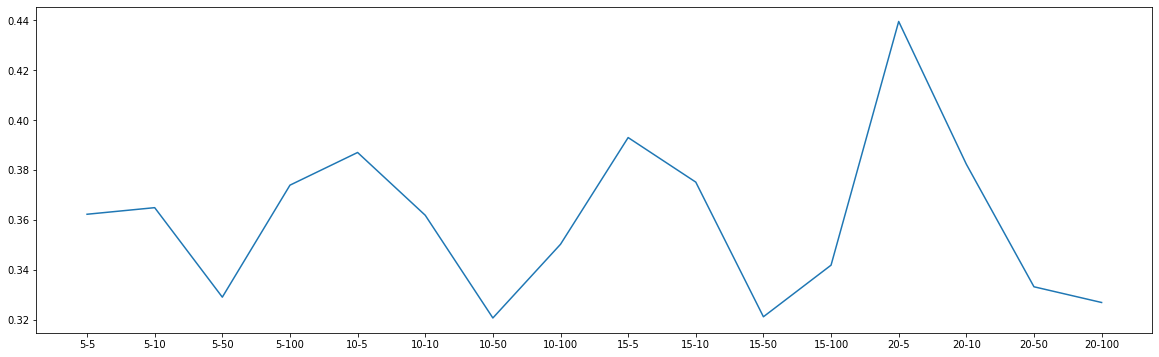

In [63]:
plt.figure(figsize=(20,6))
ResultsData.set_index('Parameters', inplace=True)
plt.plot(ResultsData['Mean Squared Log Error']);

#### Mean Squared Log Error is low when batch_size=15 & epochs=50.. Train the model using these parameters.

In [64]:
model.fit(x_train,y_train, batch_size=15, epochs=50)

Epoch 1/50
267/267 [==============================] - 1s 2ms/step - loss: 0.3474 - mean_squared_logarithmic_error: 0.3473
Epoch 2/50
267/267 [==============================] - 1s 2ms/step - loss: 0.3440 - mean_squared_logarithmic_error: 0.3440
Epoch 3/50
267/267 [==============================] - 1s 3ms/step - loss: 0.3427 - mean_squared_logarithmic_error: 0.3426
Epoch 4/50
267/267 [==============================] - 1s 2ms/step - loss: 0.3416 - mean_squared_logarithmic_error: 0.3417
Epoch 5/50
267/267 [==============================] - 1s 3ms/step - loss: 0.3408 - mean_squared_logarithmic_error: 0.3408
Epoch 6/50
267/267 [==============================] - 0s 2ms/step - loss: 0.3387 - mean_squared_logarithmic_error: 0.3394
Epoch 7/50
267/267 [==============================] - 0s 2ms/step - loss: 0.3379 - mean_squared_logarithmic_error: 0.3384
Epoch 8/50
267/267 [==============================] - 0s 2ms/step - loss: 0.3363 - mean_squared_logarithmic_error: 0.3362
Epoch 9/50
267/267 [====

In [65]:
from sklearn.metrics import mean_squared_log_error as msle
y_pred=model.predict(x_test)
MSLE=msle(y_test, y_pred)
MSLE

32/32 [==============================] - 0s 1ms/step


0.32814589038835834

### Conclusion:
1. **Found the Features which are driving the Total Creadit Card Spend".**
2. **Created ANN Regressor model to predict Total Spend of Creditcard.**